Sebelum kita memulai semuanya, mari kita mulai dengan mengimpor pustaka yang akan kita gunakan, seperti openCV, numpy, matplotlib, glob, dan skimage.

In [10]:
#impor library yang akan digunakan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

Langkah selanjutnya adalah mendefinisikan fungsi untuk metode yang akan kita eksekusi nanti. Fungsi pertama di bawah ini adalah fungsi <i>load_image()</i>. Tujuan dari fungsi ini adalah untuk memuat dataset/gambar dari komputer lokal dan menyimpannya ke dalam sebuah array. Nilai yang dikembalikan oleh fungsi ini adalah sebuah array gambar.

In [11]:
#membuat load_image yang berfungsi membaca gambar
def load_image(arr):
    strr = "Datasets/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

Fungsi selanjutnya adalah fungsi <i>preprocessing()</i>. Fungsi ini bertujuan untuk memproses dataset kita menjadi gambar skala keabuan.

In [12]:
#membuat rumus preprocessing yang berfungsi agar gambar berwarna diubah menjadi grayscale
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

Fungsi selanjutnya yang harus didefinisikan adalah <i>extractLBP()</i>. Tujuan dari fungsi ini adalah mengembalikan 2 nilai. Nilai pertama adalah hasil ekstraksi tekstur dalam bentuk gambar. Dan nilai kedua adalah hasil ekstraksi tekstur dalam bentuk vektor.

In [13]:
#membuat rumus extractLBP
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

Fungsi terakhir adalah <i> featureExtraction().</i> Fungsi ini bertujuan untuk mengembalikan array baru yang berisi tekstur yang diekstraksi, beserta vektornya.

In [14]:
#membuat rumus featureextraction
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

Langkah selanjutnya adalah memuat dataset dan menyimpannya dalam array

In [15]:
#memuat file dari dataset
data=[]
data=load_image(data)

Setelah memuat dataset, lalu melakukan proses rubah gambar ke greyscale

In [16]:
#memanggil data preprocessing
dataPreprocessed = preprocessing(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Tahap terakhir adalah mendapatkan hasil ekstraksi tekstur

In [17]:
#mendapatkan hasil vector
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


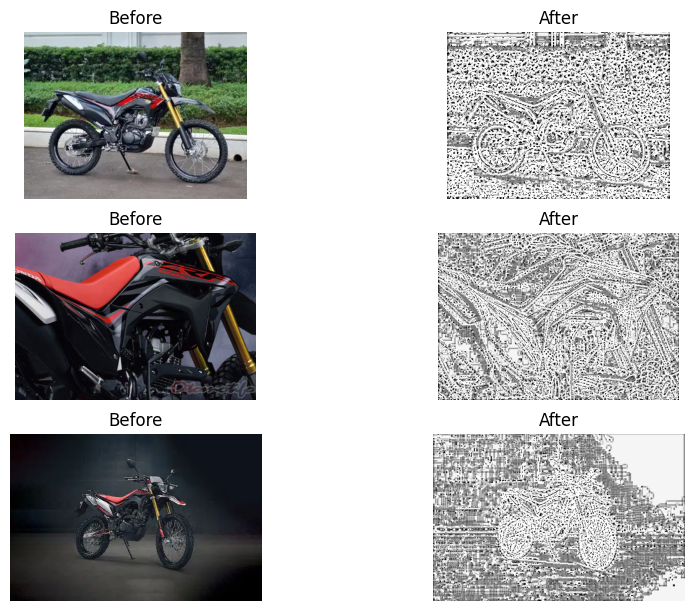

In [18]:
#menampilkan hasil tekstur pada gambar
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [19]:
#Menampilkan data vektor dari gambar
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.05328003 0.03213407 0.02158672 0.01363264 0.01140836 0.00946084
 0.00916359 0.01088561 0.01097786 0.01259738 0.01657442 0.02384174
 0.03555761 0.03328208 0.01761993 0.01633866 0.01063961 0.01210537
 0.0095531  0.01073186 0.01091636 0.01421689 0.02222222 0.03233907
 0.06164412 0.48728987]

Vector of Image 2 : [0.03977688 0.0216188  0.01886067 0.01471635 0.01226679 0.01112746
 0.01014479 0.01238073 0.01439829 0.01760741 0.02303347 0.03768336
 0.05876573 0.0475718  0.02128649 0.02387372 0.01491099 0.01938286
 0.01333966 0.01392357 0.01390458 0.01777831 0.02294802 0.02661286
 0.09026822 0.38181818]

Vector of Image 3 : [0.01712913 0.01162763 0.00894294 0.00646246 0.00756757 0.00706306
 0.00729129 0.01553153 0.01828829 0.02792192 0.03594595 0.04275676
 0.05259459 0.06772372 0.0374955  0.05029429 0.02742943 0.03888889
 0.02696697 0.02029429 0.01548949 0.01633634 0.01544745 0.01488288
 0.18537538 0.22425225]
